<a href="https://colab.research.google.com/github/Viktory4121/MME/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1

In [75]:
library(datasets)
data <- iris
head(data)

part_data <- data[1:4]

#coding_categ_data <- function(data) {
#  new_data <- transform(data, Species = as.numeric(as.factor(Species)))
#  return(new_data)
#}
#cdata <- coding_categ_data(data)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [76]:
#install.packages("cluster")
library(cluster)

In [86]:
model_kmeans <- kmeans(part_data, centers = 3, nstart = 1)
print(model_kmeans)

K-means clustering with 3 clusters of sizes 50, 62, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.006000    3.428000     1.462000    0.246000
2     5.901613    2.748387     4.393548    1.433871
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 15.15100 39.82097 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


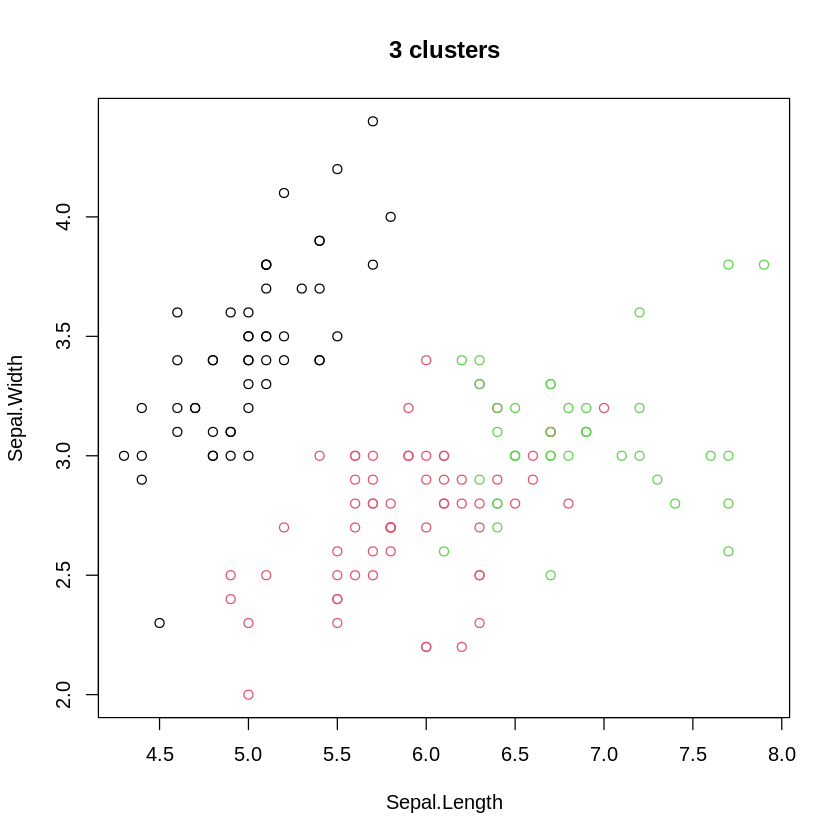

In [87]:
plot(part_data[c("Sepal.Length", "Sepal.Width")], col = model_kmeans$cluster, main = "3 clusters")

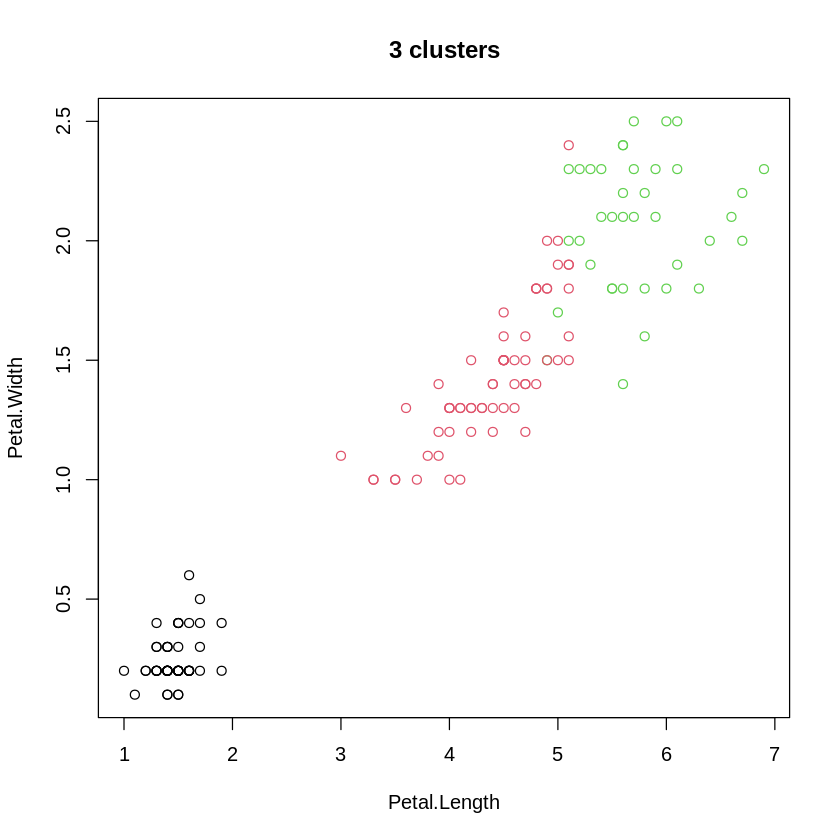

In [88]:
plot(part_data[c("Petal.Length", "Petal.Width")], col = model_kmeans$cluster, main = "3 clusters")

In [80]:
#install.packages("factoextra")
#install.packages("purrr")
library(factoextra)
library(purrr)


Call:
hclust(d = dist_ward, method = "ward.D")

Cluster method   : ward.D 
Distance         : euclidean 
Number of objects: 150 



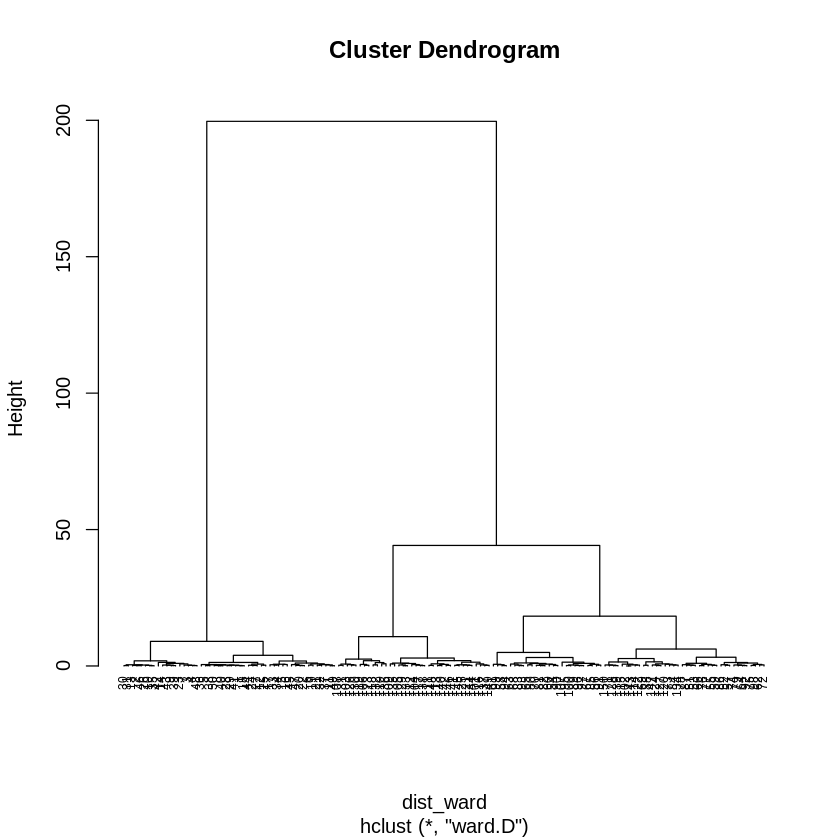

In [89]:
dist_ward <- dist(part_data, method = "euclidean")
model_ward <- hclust(dist_ward, method = "ward.D" )
print(model_ward)
plot(model_ward, cex = 0.6, hang = -1)

  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2


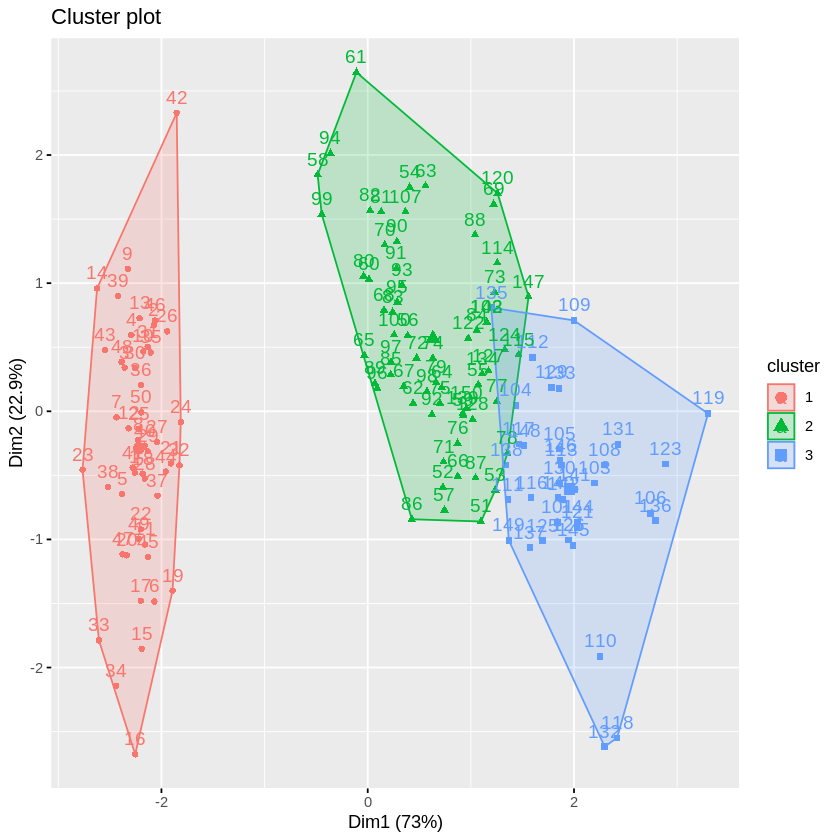

In [90]:
sub_grps <- cutree(model_ward, k = 3)
print(sub_grps)
fviz_cluster(list(data = part_data, cluster = sub_grps))

[1] 0.953798

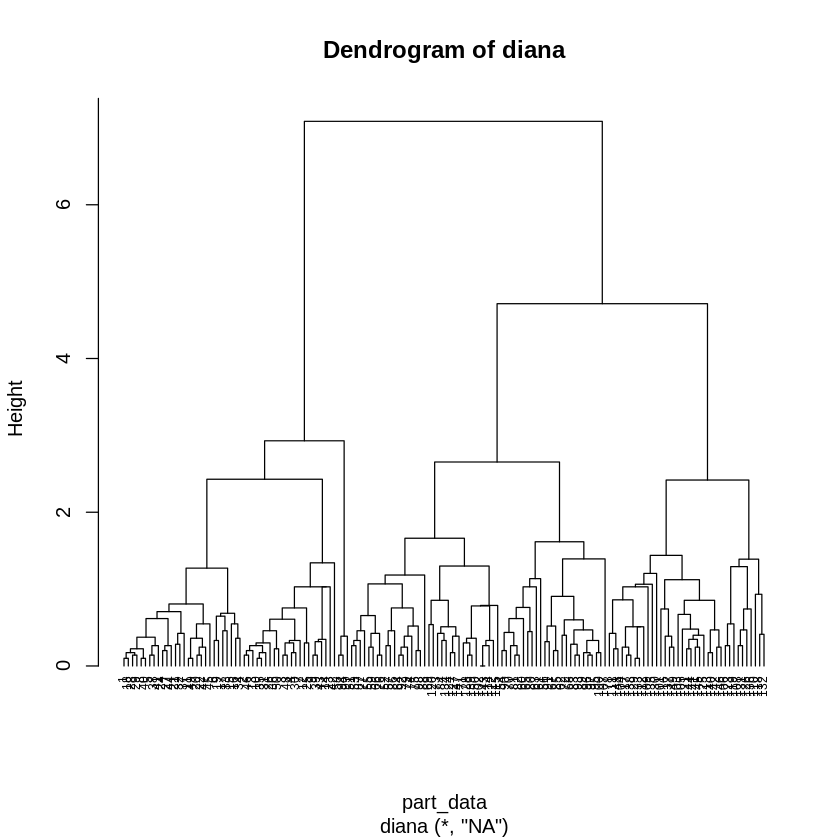

In [91]:
model_diana <- diana(part_data)
model_diana$dc
 
# Plot obtained dendrogram
pltree(model_diana, cex = 0.6, hang = -1,
       main = "Dendrogram of diana")

#2

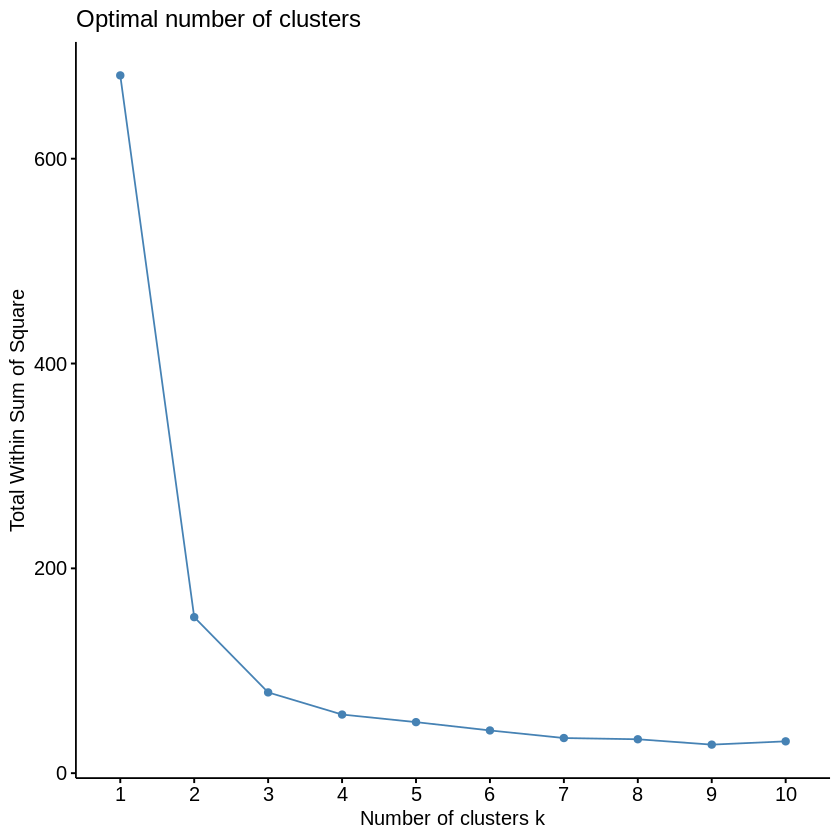

In [92]:
fviz_nbclust(part_data, kmeans, method = "wss")

#3

In [95]:
class_charact <- function(table, num_factor, log = TRUE){
  if(log){
    SE <- table[num_factor, num_factor] / (sum(table[, num_factor]))
    SP_ch <- 0
    SP_zn <- 0
    for (i in 1:ncol(table)){
      if (i != num_factor){
        SP_ch <- SP_ch + table[i, 1]
        SP_zn <- SP_zn + sum(table[i, ])
      }
    }
    SP <- SP_ch / SP_zn
    AC = sum(diag(table)) / sum(colSums(table))

    m <- matrix(c(SE, SP, AC), ncol=3, byrow=TRUE)
    colnames(m) <- c('Чувствительность','Специфичность','Точность')
    rezult <- as.table(m)
    print(rezult)
    } else {
      AC = sum(diag(table)) / sum(colSums(table))
      return (AC)
    }
}

table_cluster3 <- table(model_kmeans$cluster, data$Species)
print(table_cluster3)
class_charact(table_cluster3, 3)

   
    setosa versicolor virginica
  1     50          0         0
  2      0         48        14
  3      0          2        36
  Чувствительность Специфичность  Точность
A        0.7200000     0.4464286 0.8933333


In [97]:
table_cluster3_ward <- table(sub_grps, data$Species)
print(table_cluster3_ward)
class_charact(table_cluster3_ward, 3)

        
sub_grps setosa versicolor virginica
       1     50          0         0
       2      0         50        14
       3      0          0        36
  Чувствительность Специфичность  Точность
A        0.7200000     0.4385965 0.9066667
